In [5]:
import pandas as pd
pd.set_option("display.max_columns", 100)
%matplotlib inline

# Even more text analysis with scikit-learn

We've spent the past week counting words, *and we're just going to keep right on doing it.*

The technical term for this is **bag of words** analysis, because it doesn't care about what order the words are in. It's like you just took all of the words in a speech or a book or whatever and just dumped them into a bag. A bag of words.

It seems like it would be terrible but it really gets the job done.

# Even more dumb sentences

We can't let go of fish, bugs, and Penny. But this time we also have some cats.

In [6]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the bug, it is still meowing at the bug and the fish",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

# Exercise A : Put these sentences into TWO sensible groups

Not with programming, just with your brain.

In [7]:
# Sentences with Penny
"Penny bought bright blue fishes."
"Penny bought bright blue and orange fish."
"Penny went to the store. Penny ate a bug. Penny saw a fish."
"Penny is a fish"

# Sentences without Penny
"The cat ate a fish at the store."
"It meowed once at the bug, it is still meowing at the bug and the fish"
"The cat is at the fish store. The cat is orange. The cat is meowing at the fish."

'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.'

# Exercise B: Put these sentences into THREE groups based on their content

Again, not with programming, just with your brain.

In [8]:
# Start with Penny
"Penny bought bright blue fishes."
"Penny bought bright blue and orange fish."
"Penny went to the store. Penny ate a bug. Penny saw a fish."
"Penny is a fish"

# Start with the cat
"The cat ate a fish at the store."
"The cat is at the fish store. The cat is orange. The cat is meowing at the fish."

# Start with it
"It meowed once at the bug, it is still meowing at the bug and the fish"    

'It meowed once at the bug, it is still meowing at the bug and the fish'

# Now, on to the computer

We already know how to **vectorize**, how to convert sentences into numeric representations. We use a **vectorizer!** There are two options we've learned about, the `CountVectorizer` and the `TfidfVectorizer`.

* `CountVectorizer`: count the words
* `TfidfVectorizer`: percentage of the words in a sentence (kind of)

### CountVectorizer

Just normal counting

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,is,it,meowed,meowing,once,orange,penny,saw,still,store,the,to,went
0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,3,1,0,1,1,1,1
4,1,2,0,0,0,0,2,0,1,0,1,2,1,1,1,0,0,0,1,0,3,0,0
5,0,2,0,0,0,0,0,3,2,0,3,0,0,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### TfidfVectorizer

So far we've used `TfIdfVectorizer` to compare sentences of different length (your name in a tweet vs. your name in a book).

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,and,at,ate,blue,bought,bright,bug,cat,fish,fishes,is,it,meowed,meowing,once,orange,penny,saw,still,store,the,to,went
0,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.200000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.142857,0.000000,0.000000,0.142857,0.142857,0.142857,0.000000,0.000000,0.142857,0.0,0.000000,0.000,0.0000,0.000000,0.0000,0.142857,0.142857,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.0,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.142857,0.285714,0.000000,0.000000
3,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.090909,0.000000,0.090909,0.0,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.272727,0.090909,0.0000,0.090909,0.090909,0.090909,0.090909
4,0.062500,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.062500,0.0,0.062500,0.125,0.0625,0.062500,0.0625,0.000000,0.000000,0.000000,0.0625,0.000000,0.187500,0.000000,0.000000
5,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.111111,0.0,0.166667,0.000,0.0000,0.055556,0.0000,0.055556,0.000000,0.000000,0.0000,0.055556,0.277778,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.000,0.0000,0.000000,0.0000,0.000000,0.333333,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


## Stemming

That all seems fine, but we need to combine `meow` and `meowing` and whatever else, yeah? We'll use TextBlob for that, and give our vectorizer a custom tokenizer.

In [13]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,a,and,at,ate,blue,bought,bright,bug,cat,fish,is,it,meow,onc,orang,penni,saw,still,store,the,to,went
0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0
3,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,3,1,0,1,1,1,1
4,0,1,2,0,0,0,0,2,0,1,1,2,2,1,0,0,0,1,0,3,0,0
5,0,0,2,0,0,0,0,0,3,2,3,0,1,0,1,0,0,0,1,5,0,0
6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


## ...oh, and stopwords

And let's get rid of stopwords, too

In [16]:
vec = CountVectorizer(tokenizer=textblob_tokenizer, stop_words='english')
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
1,0,1,1,1,0,0,1,0,0,1,1,0,0,0
2,1,0,0,0,0,1,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,3,1,1,1
4,0,0,0,0,2,0,1,2,1,0,0,0,0,0
5,0,0,0,0,0,3,2,1,0,1,0,0,1,0
6,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [20]:
# A custom list if we really wanted to
vec = CountVectorizer(tokenizer=textblob_tokenizer, stop_words=['it', 'and', 'is', 'a'])
matrix = vec.fit_transform(texts)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,at,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,still,store,the,to,went
0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,2,0,0
3,0,1,0,0,0,1,0,1,0,0,0,3,1,0,1,1,1,1
4,2,0,0,0,0,2,0,1,2,1,0,0,0,1,0,3,0,0
5,2,0,0,0,0,0,3,2,1,0,1,0,0,0,1,5,0,0
6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


# Section One: Term Frequency (TF)

We've talked about **term frequency** before, it's just the percentage of times the words are used in a sentence. Let's refresh what our sentences are, then use a `TfidfVectorizer`.

In [21]:
texts = [
    "Penny bought bright blue fishes.",
    "Penny bought bright blue and orange fish.",
    "The cat ate a fish at the store.",
    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
    "It meowed once at the bug, it is still meowing at the bug and the fish",
    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
    "Penny is a fish"
]

In [26]:
# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l1', # ELL - ONE
                      use_idf=False)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.200000,0.200000,0.200000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.166667,0.166667,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
3,0.111111,0.000000,0.000000,0.000000,0.111111,0.000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.250000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


## Which sentence is the most about fish?

In [28]:
df.sort_values(by='fish', ascending=False)

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.000000,0.000000,0.000000,0.250,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.375,0.250000,0.125000,0.000000,0.125000,0.000000,0.000000,0.125000,0.000000
0,0.000000,0.200000,0.200000,0.200000,0.000000,0.000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.000000,0.166667,0.166667,0.166667,0.000000,0.000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.333333,0.000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.111111,0.000000,0.000000,0.000000,0.111111,0.000,0.111111,0.000000,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111


## What about fish AND meowing?

In [29]:
df[['fish', 'meow']]

,fish,meow
0,0.200000,0.000000
1,0.166667,0.000000
2,0.250000,0.000000
3,0.111111,0.000000
4,0.166667,0.333333
5,0.250000,0.125000
6,0.500000,0.000000


In [32]:
# Add them together!
# Percent of words about either 'meow' or 'fish'
df.meow + df.fish

0    0.200000
1    0.166667
2    0.250000
3    0.111111
4    0.500000
5    0.375000
6    0.500000
dtype: float64

In [33]:
pd.DataFrame({
    'fish': df.fish,
    'meow': df.meow,
    'meow + fish': df.meow + df.fish
})

,fish,meow,meow + fish
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [ ]:
#    "Penny bought bright blue fishes.",
#    "Penny bought bright blue and orange fish.",
#    "The cat ate a fish at the store.",
#    "Penny went to the store. Penny ate a bug. Penny saw a fish.",
"It meowed once at the bug, it is still meowing at the bug and the fish",
#    "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
"Penny is a fish"

Looks like index `4` and `6` are tied, but `meow` doesn't even show up in six! That's no good, or at least it *seems* silly.

It seems like since `fish` shows up again and again it should be weighted a little less - not like it’s a stopword, but just... it’s kind of cliche to have it show up in the text, so we want to make it less important.

So maybe, you know **popular words should be less important.**

# Section Two: Inverse Document Frequency (IDF)

The concept that words that are more popular across all of the documents should be less important is **inverse document frequency!** We're going to try it again, this time changing `use_idf=False` to `use_idf=True`. The vectorizer actually uses inverse document frequency by default, but this will help us remember what is going on.

In [34]:
# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l1',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.235463,0.235463,0.235463,0.000000,0.000000,0.118871,0.000000,0.000000,0.000000,0.174741,0.000000,0.000000,0.000000
1,0.000000,0.190587,0.190587,0.190587,0.000000,0.000000,0.096216,0.000000,0.000000,0.190587,0.141437,0.000000,0.000000,0.000000
2,0.297654,0.000000,0.000000,0.000000,0.000000,0.297654,0.150267,0.000000,0.000000,0.000000,0.000000,0.000000,0.254425,0.000000
3,0.125073,0.000000,0.000000,0.000000,0.125073,0.000000,0.063142,0.000000,0.000000,0.000000,0.278455,0.150675,0.106908,0.150675
4,0.000000,0.000000,0.000000,0.000000,0.350291,0.000000,0.088420,0.350291,0.210997,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.437035,0.147088,0.145678,0.000000,0.145678,0.000000,0.000000,0.124521,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404858,0.000000,0.000000,0.000000,0.595142,0.000000,0.000000,0.000000


In [35]:
# OLD dataframe
pd.DataFrame({
    'fish': df.fish,
    'meow': df.meow,
    'meow + fish': df.meow + df.fish
})

,fish,meow,meow + fish
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [37]:
# NEW dataframe
pd.DataFrame({
    'fish': idf_df.fish,
    'meow': idf_df.meow,
    'meow + fish': idf_df.meow + idf_df.fish
})

,fish,meow,meow + fish
0,0.118871,0.000000,0.118871
1,0.096216,0.000000,0.096216
2,0.150267,0.000000,0.150267
3,0.063142,0.000000,0.063142
4,0.088420,0.350291,0.438712
5,0.147088,0.145678,0.292766
6,0.404858,0.000000,0.404858


Okay, so things changed a little, but **I'm honestly not that impressed.**'

You know how we've been setting `norm=l1` all of the time. By default it's actually uses an `l2`(Euclidean) norm, which works a lot better, pulling apart the differences between sentences. Why? I don't know. What does it mean? I don't know. How does it work? I don't know. But let's get rid of that "ELL ONE" in order to work with the defaults.

In [38]:
# We have to *get rid of* norm='l1' because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.512612,0.512612,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.000000,0.380417,0.000000,0.000000,0.000000
1,0.000000,0.456170,0.456170,0.456170,0.000000,0.000000,0.230292,0.000000,0.000000,0.456170,0.338530,0.000000,0.000000,0.000000
2,0.578752,0.000000,0.000000,0.000000,0.000000,0.578752,0.292176,0.000000,0.000000,0.000000,0.000000,0.000000,0.494698,0.000000
3,0.303663,0.000000,0.000000,0.000000,0.303663,0.000000,0.153301,0.000000,0.000000,0.000000,0.676058,0.365821,0.259561,0.365821
4,0.000000,0.000000,0.000000,0.000000,0.641958,0.000000,0.162043,0.641958,0.386682,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.840166,0.282766,0.280055,0.000000,0.280055,0.000000,0.000000,0.239382,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.000000


Now let's compare again.

In [39]:
# OLD dataframe
pd.DataFrame({
    'fish': df.fish,
    'meow': df.meow,
    'meow + fish': df.meow + df.fish
})

,fish,meow,meow + fish
0,0.200000,0.000000,0.200000
1,0.166667,0.000000,0.166667
2,0.250000,0.000000,0.250000
3,0.111111,0.000000,0.111111
4,0.166667,0.333333,0.500000
5,0.250000,0.125000,0.375000
6,0.500000,0.000000,0.500000


In [40]:
# NEW dataframe
pd.DataFrame({
    'fish': idf_df.fish,
    'meow': idf_df.meow,
    'meow + fish': idf_df.meow + idf_df.fish
})

,fish,meow,meow + fish
0,0.258786,0.000000,0.258786
1,0.230292,0.000000,0.230292
2,0.292176,0.000000,0.292176
3,0.153301,0.000000,0.153301
4,0.162043,0.641958,0.804000
5,0.282766,0.280055,0.562821
6,0.562463,0.000000,0.562463


In [41]:
# .5 => .8 "It meowed once at the bug, it is still meowing at the bug and the fish",
# .375 => .56 "The cat is at the fish store. The cat is orange. The cat is meowing at the fish.",
# .5 => .56 "Penny is a fish"

Now *that's* a lot better. Look at index 4! It's amazing! Sure, we have a **fish** but that **meow** is just powering beyond anything known to humankind!

# Section Three: Document Similarity

## Who cares? Why do we need to know this?

When someone dumps 100,000 documents on your desk in response to FOIA, you’ll start to care! One of the reasons understanding TF-IDF is important is because of **document similarity**. By knowing what documents are similar you’re able to find related documents and automatically group documents into clusters.

For example! Let’s cluster these documents using **K-Means clustering** (check out this [gif](http://practicalcryptography.com/media/miscellaneous/files/k_mean_send.gif)). K means basically plots all of the numbers on a graph and grabs the ones that group together. It doesn't make sense right now, but we'll do a simpler example in a second.

In [43]:
# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(texts)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df

,ate,blue,bought,bright,bug,cat,fish,meow,onc,orang,penni,saw,store,went
0,0.000000,0.512612,0.512612,0.512612,0.000000,0.000000,0.258786,0.000000,0.000000,0.000000,0.380417,0.000000,0.000000,0.000000
1,0.000000,0.456170,0.456170,0.456170,0.000000,0.000000,0.230292,0.000000,0.000000,0.456170,0.338530,0.000000,0.000000,0.000000
2,0.578752,0.000000,0.000000,0.000000,0.000000,0.578752,0.292176,0.000000,0.000000,0.000000,0.000000,0.000000,0.494698,0.000000
3,0.303663,0.000000,0.000000,0.000000,0.303663,0.000000,0.153301,0.000000,0.000000,0.000000,0.676058,0.365821,0.259561,0.365821
4,0.000000,0.000000,0.000000,0.000000,0.641958,0.000000,0.162043,0.641958,0.386682,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.840166,0.282766,0.280055,0.000000,0.280055,0.000000,0.000000,0.239382,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.562463,0.000000,0.000000,0.000000,0.826823,0.000000,0.000000,0.000000


In [48]:
# KMeans clustering a kind of clustering.
from sklearn.cluster import KMeans

number_of_clusters=2
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit
# It just means "HEY TAKE A LOOK AT AND TRY ON MY TEXT STUFF"

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [51]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: penni fish bright bought blue
Cluster 1: cat meow fish store bug


In [53]:
km.labels_

array([0, 0, 1, 0, 1, 1, 0], dtype=int32)

In [54]:
texts

['Penny bought bright blue fishes.',
 'Penny bought bright blue and orange fish.',
 'The cat ate a fish at the store.',
 'Penny went to the store. Penny ate a bug. Penny saw a fish.',
 'It meowed once at the bug, it is still meowing at the bug and the fish',
 'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
 'Penny is a fish']

In [55]:
results = pd.DataFrame()
results['text'] = texts
results['category'] = km.labels_
results

,text,category
0,Penny bought bright blue fishes.,0
1,Penny bought bright blue and orange fish.,0
2,The cat ate a fish at the store.,1
3,Penny went to the store. Penny ate a bug. Penn...,0
4,"It meowed once at the bug, it is still meowing...",1
5,The cat is at the fish store. The cat is orang...,1
6,Penny is a fish,0


## How about 3 categories of documents?

In [56]:
# KMeans clustering a kind of clustering.
from sklearn.cluster import KMeans

number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit
# It just means "HEY TAKE A LOOK AT AND TRY ON MY TEXT STUFF"

<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [57]:
km.labels_

array([0, 0, 1, 2, 2, 1, 2], dtype=int32)

In [59]:
results = pd.DataFrame({
    'text': texts,
    'category': km.labels_
})
results

,category,text
0,0,Penny bought bright blue fishes.
1,0,Penny bought bright blue and orange fish.
2,1,The cat ate a fish at the store.
3,2,Penny went to the store. Penny ate a bug. Penn...
4,2,"It meowed once at the bug, it is still meowing..."
5,1,The cat is at the fish store. The cat is orang...
6,2,Penny is a fish


In [66]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :3]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: bright bought blue
Cluster 1: cat store ate
Cluster 2: penni bug fish


## That was confusing. Can we visualize it?

This time we're going to say, **only find two important words to measure**. We're going to use `max_features=` to have it auto-select, but we could also use `vocabulary=` if we wanted to.

In [69]:
texts = [
    'Penny bought bright blue fishes.',
    'Penny bought bright blue and orange bowl.',
    'The cat ate a fish at the store.',
    'Penny went to the store. Penny ate a bug. Penny saw a fish.',
    'It meowed once at the bug, it is still meowing at the bug and the fish',
    'The cat is at the fish store. The cat is orange. The cat is meowing at the fish.',
    'Penny is a fish.',
    'Penny Penny she loves fishes Penny Penny is no cat.',
    'The store is closed now.',
    'How old is that tree?',
    'I do not eat fish I do not eat cats I only eat bugs.'
]

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True,
                      max_features=2)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

,fish,penni
0,0.605349,0.795961
1,0.000000,1.000000
2,1.000000,0.000000
3,0.245735,0.969337
4,1.000000,0.000000
5,1.000000,0.000000
6,0.605349,0.795961
7,0.186785,0.982401
8,0.000000,0.000000
9,0.000000,0.000000


Notice how we now have two numbers for every sentence? Well, let's plot them!

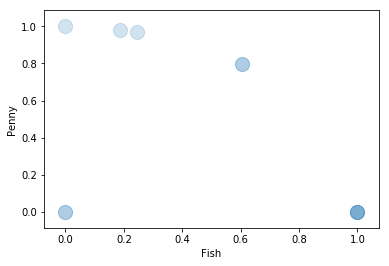

In [70]:
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.2, s=200)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

You can see a few groups. 3 or 4, maybe? Let's see if we can do the same 

In [71]:
number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
# Move the labels into a column of our dataframe
# the first label matches the first row, second label is second row, etc
df['category'] = km.labels_
df

,fish,penni,category
0,0.605349,0.795961,0
1,0.000000,1.000000,0
2,1.000000,0.000000,1
3,0.245735,0.969337,0
4,1.000000,0.000000,1
5,1.000000,0.000000,1
6,0.605349,0.795961,0
7,0.186785,0.982401,0
8,0.000000,0.000000,2
9,0.000000,0.000000,2


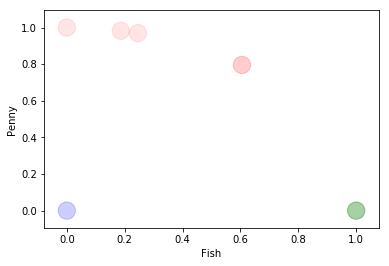

In [75]:
# Category 0 is red
# Category 1 is green
# Category 2 is blue
colormap = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# Create a list of colors from every single row
colors = df.apply(lambda row: colormap[row.category], axis=1)

# And plot it!
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

Ooh, that's fun, right? Let's try it again, this time with **four categories** instead of three.

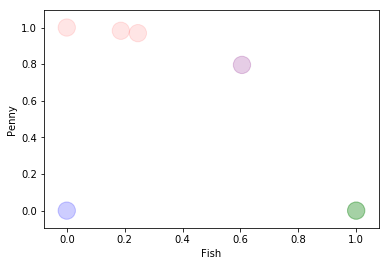

In [76]:
km = KMeans(n_clusters=4)
km.fit(matrix)
df['category'] = km.labels_

colormap = { 0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
colors = df.apply(lambda row: colormap[row.category], axis=1)
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

Now just imagine instead of 2 dimensions (2 words), you have 100 dimensions (100 words). It's more complicated and you sure can't visualize it, but it's the same thing!

## Using more information

Right now we're only vectorizing **Penny** and **fish** - remember how we did `max_features`? Right now it's only doing term frequency across those two elements - it doesn't matter if there are 10000 words in a book, if "Penny" shows up once and "fish" shows up twice, the vectorizer is like "OH BOY THIS IS ALL ABOUT FISH."

If we wanted it to be a little more aware of the rest of the words, we could do our vectorization across *all* features (all words), then only selecting the `fish` and `penni` columns when *doing K-means fit*.

In [77]:
# Vectorize and save into a new dataframe
vec = TfidfVectorizer(tokenizer=textblob_tokenizer, stop_words='english', use_idf=True)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df.head(2)

,ate,blue,bought,bowl,bright,bug,cat,close,eat,fish,love,meow,old,onc,onli,orang,penni,saw,store,tree,went
0,0.0,0.513353,0.513353,0.000000,0.513353,0.0,0.0,0.0,0.0,0.277013,0.0,0.0,0.0,0.0,0.0,0.000000,0.364239,0.0,0.0,0.0,0.0
1,0.0,0.412669,0.412669,0.482788,0.412669,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.412669,0.292801,0.0,0.0,0.0,0.0


So now that we have a count of ALL of the words, let's ask K-Means to only pay attention to `fish` and `penni`.

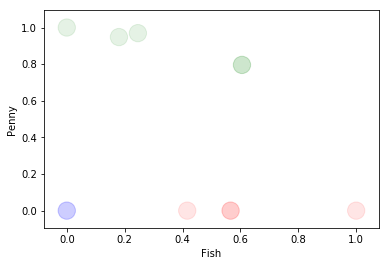

In [80]:
# Cluster with 3 categories
# only using the 'fish' and 'penni' categories
km = KMeans(n_clusters=3)
km.fit(df[['fish', 'penni']])

# Assign the category to the dataframe
df['category'] = km.labels_

# Build our color map
colormap = { 0: 'red', 1: 'green', 2: 'blue' }
colors = df.apply(lambda row: colormap[row.category], axis=1)

# Plot our scatter
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.1, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

Notice how we normally do `km.fit(matrix)` but this time we did `km.fit(df[['fish', 'penni']])`? It turns out that **you can use `matrix` and `df` interchangeably**. The `df` is just the matrix with column names.

## Time to get crazy

What if we're talking about **3 features?** 3 different words? It doesn't seem that nuts, but... can we graph that?

In [81]:
# Vectorize and save into a new dataframe
vec = TfidfVectorizer(tokenizer=textblob_tokenizer, max_features=3, stop_words='english', use_idf=True)
matrix = vec.fit_transform(texts)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df.head(2)

,cat,fish,penni
0,0.0,0.605349,0.795961
1,0.0,0.000000,1.000000


In [82]:
# Cluster
km = KMeans(n_clusters=4)
km.fit(df)

# Assign the category to the dataframe
df['category'] = km.labels_

# Build our color map
colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}
colors = df.apply(lambda row: colormap[row.category], axis=1)

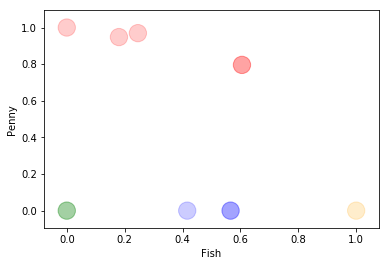

In [84]:
# Plot our scatter
ax = df.plot(kind='scatter', x='fish', y='penni', alpha=0.2, s=300, c=colors)
ax.set_xlabel("Fish")
ax.set_ylabel("Penny")

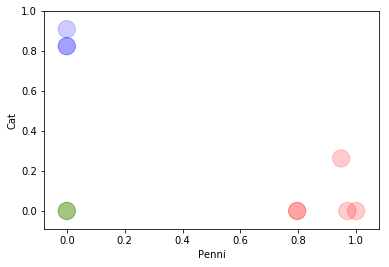

In [85]:
# Plot our scatter
ax = df.plot(kind='scatter', x='penni', y='cat', alpha=0.2, s=300, c=colors)
ax.set_xlabel("Penni")
ax.set_ylabel("Cat")

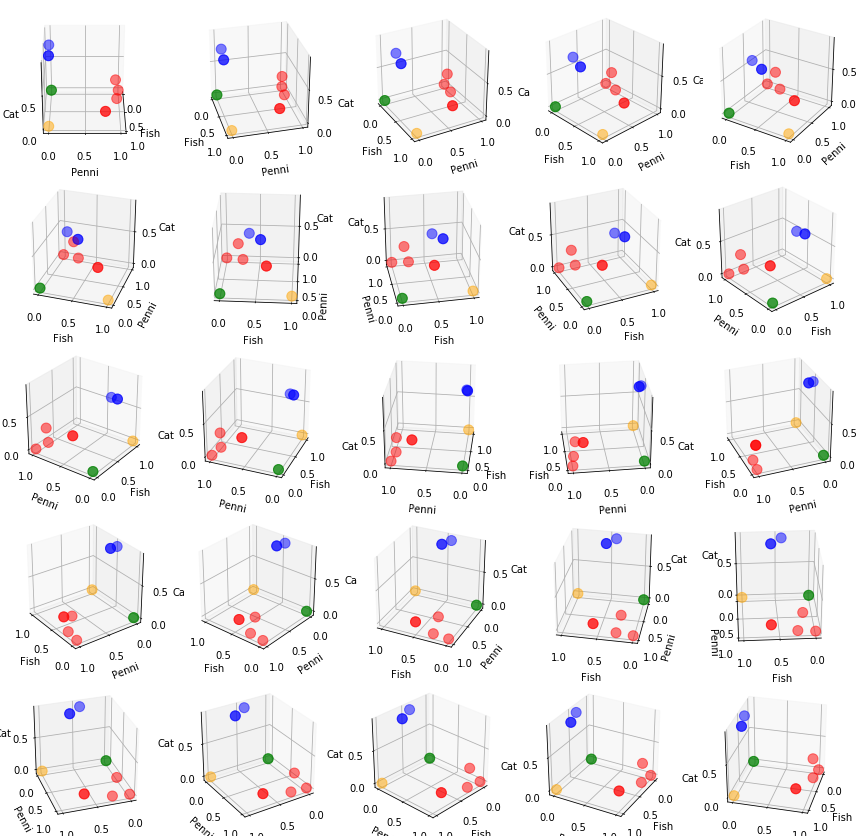

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    colormap = { 0: 'red', 1: 'green', 2: 'blue', 3: 'orange' }
    colors = df.apply(lambda row: colormap[row.category], axis=1)

    ax.scatter(df['fish'], df['penni'], df['cat'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('Fish')
    ax.set_ylabel('Penni')
    ax.set_zlabel('Cat')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)